In [1]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_dataset()

In [2]:
def mn (X_train, Y_train, X_test, Y_test):
	from keras.models import Model # basic class for specifying and training a neural network
	from keras.layers import Input, Dense # the two types of neural network layer we will be using
	from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
	import numpy as np

	print ('image has', X_train.shape[1]*X_train.shape[2], 'pixels')
	
	batch_size = 128 # in each iteration, we consider 128 training examples at once
	num_epochs = 100 # we iterate twenty times over the entire training set
	hidden_size = 2048 # there will be 512 neurons in both hidden layers

	num_train = X_train.shape[0] # there are 60000 training examples in MNIST
	num_test = X_test.shape[0] # there are 10000 test examples in MNIST

	in_height = X_test[0].shape[0]
	in_width = X_test[0].shape[1]
	
	X_train = X_train.reshape(num_train, in_height * in_width) # Flatten data to 1D
	X_test = X_test.reshape(num_test, in_height * in_width) # Flatten data to 1D
	X_train = X_train.astype('float32') 
	X_test = X_test.astype('float32')
	X_train /= 255 # Normalise data to [0, 1] range
	X_test /= 255 # Normalise data to [0, 1] range

	out_height = Y_test[0].shape[0]
	out_width = Y_test[0].shape[1]

	Y_train = Y_train.reshape(num_train, out_height * out_width) # Flatten data to 1D
	Y_test = Y_test.reshape(num_test, out_height * out_width) # Flatten data to 1D
	Y_train = Y_train.astype('float32') 
	Y_test = Y_test.astype('float32')
	Y_train /= 255 # Normalise data to [0, 1] range
	Y_test /= 255 # Normalise data to [0, 1] range

	inp = Input(shape=(in_height * in_width,)) # Our input is a 1D vector of size 784
    
	hidden = Dense(hidden_size)(inp)
	hidden = Dense(hidden_size)(hidden)
	hidden = Dense(hidden_size)(hidden)
	#hidden = Dense(hidden_size, activation='relu')(hidden)
	#hidden = Dense(hidden_size, activation='relu')(hidden)
    
	out = Dense(out_height * out_width)(hidden) # Output softmax layer

	model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

	model.compile(loss='mean_squared_error', # using the cross-entropy loss function
				  optimizer='adadelta', # using the Adam optimiser
				  metrics=['accuracy']) # reporting the accuracy

	model.fit(X_train, Y_train, # Train the model using the training set...
			  batch_size=batch_size, nb_epoch=num_epochs,
			  verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
	print(model.evaluate(X_test, Y_test, verbose=1)) # Evaluate the trained model on the test set!
    
	return model

In [3]:
print (len(X_train))

print (X_train[0].shape)
print (X_train[1].shape)

print (len(X_test))
print (X_test[0].shape)
print (X_test[1].shape)

model = mn(X_train[0], X_train[2], X_test[0], X_test[2])

3
(76371, 37, 20, 1)
(76371, 19, 20, 1)
3
(19119, 37, 20, 1)
(19119, 19, 20, 1)


Using TensorFlow backend.


image has 740 pixels


C:\Users\kostyad\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\kostyad\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 68733 samples, validate on 7638 samples
Epoch 1/100
68733/68733 [==============================] - 250s - loss: 0.0660 - acc: 0.0108 - val_loss: 0.0277 - val_acc: 0.0128
Epoch 2/100
68733/68733 [==============================] - 251s - loss: 0.0268 - acc: 0.0138 - val_loss: 0.0230 - val_acc: 0.0149
Epoch 3/100
68733/68733 [==============================] - 247s - loss: 0.0237 - acc: 0.0146 - val_loss: 0.0222 - val_acc: 0.0164
Epoch 4/100
68733/68733 [==============================] - 243s - loss: 0.0232 - acc: 0.0139 - val_loss: 0.0221 - val_acc: 0.0196
Epoch 5/100
68733/68733 [==============================] - 242s - loss: 0.0231 - acc: 0.0142 - val_loss: 0.0220 - val_acc: 0.0135
Epoch 6/100
68733/68733 [==============================] - 243s - loss: 0.0230 - acc: 0.0146 - val_loss: 0.0219 - val_acc: 0.0140
Epoch 7/100
68733/68733 [==============================] - 243s - loss: 0.0229 - acc: 0.0150 - val_loss: 0.0219 - val_acc: 0.0162
Epoch 8/100
68733/68733 [================

In [6]:
def mn_evaluate_random(model, X_test, Y_test):
	import numpy as np
		
	def slice (X_test, num):
		single = []
		for i in range(len(X_test)):
			single.append(np.array([X_test[i][num]]))
		return single
	
	randidx = np.random.randint(0, len(X_test))
	x = np.array([X_test[randidx]])
	y = np.array([Y_test[randidx]])
    
	y_height = Y_test[0].shape[0]
	y_width = Y_test[0].shape[1]
	x_height = X_test[0].shape[0]
	x_width = X_test[0].shape[1]
	
	#x = x.reshape(x_height * x_width) # Flatten data to 1D
	x = x.astype('float32') 
	x /= 255 # Normalise data to [0, 1] range

	#y = y.reshape(y_height * y_width) # Flatten data to 1D
	y = y.astype('float32') 
	y /= 255 # Normalise data to [0, 1] range
	
	from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

	import matplotlib.pyplot as plt
	fig = plt.figure(figsize=(16, 4))

	a = x[0] 
	a = a.T[0].T
	ax = fig.add_subplot(131)
	vm = np.percentile(a, 99)
	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'vmin': -vm,
		'vmax': vm,
		'aspect': 'auto'
	}
	plt.imshow(a, **imparams)

	a = y[0] 
	a = a.T[0].T

	ax = fig.add_subplot(132)

	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'aspect': 'auto'
		}
	plt.imshow(a, **imparams)

	X = X_test[randidx]
	X = X.reshape(1, x_height * x_width) # Flatten data to 1D
	X = X.astype('float32')
	X /= 255 # Normalise data to [0, 1] range
	
	predicted_y = model.predict(X)
    
	predicted_y = predicted_y.reshape(y_height, y_width)
	a = predicted_y
	
	#a = a.T[0].T
	ax = fig.add_subplot(133)

	imparams = {
		#'interpolation': 'none',
		'cmap': "gray",
		'aspect': 'auto'
		}
	plt.imshow(a, **imparams)

	return randidx, x, y, predicted_y

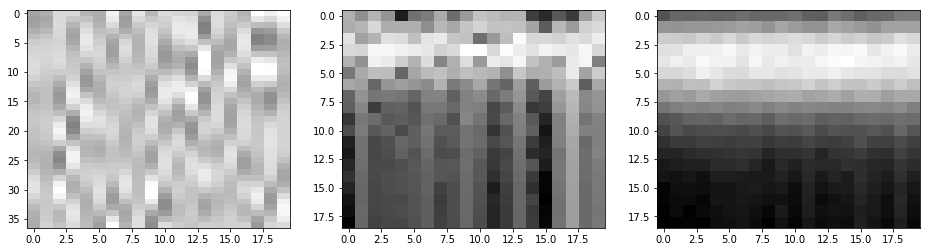

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

randidx, x, y, predicted_y = mn_evaluate_random(model, X_test[0], X_test[2])
#print (y)
#print (predicted_y)